<a href="https://colab.research.google.com/github/pickle-lotus0976/Learning/blob/main/PyTorch%20Notebooks/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [45]:
# Set random seeds for reprodcibilty
torch.manual_seed(42)

In [46]:
df = pd.read_csv("/content/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


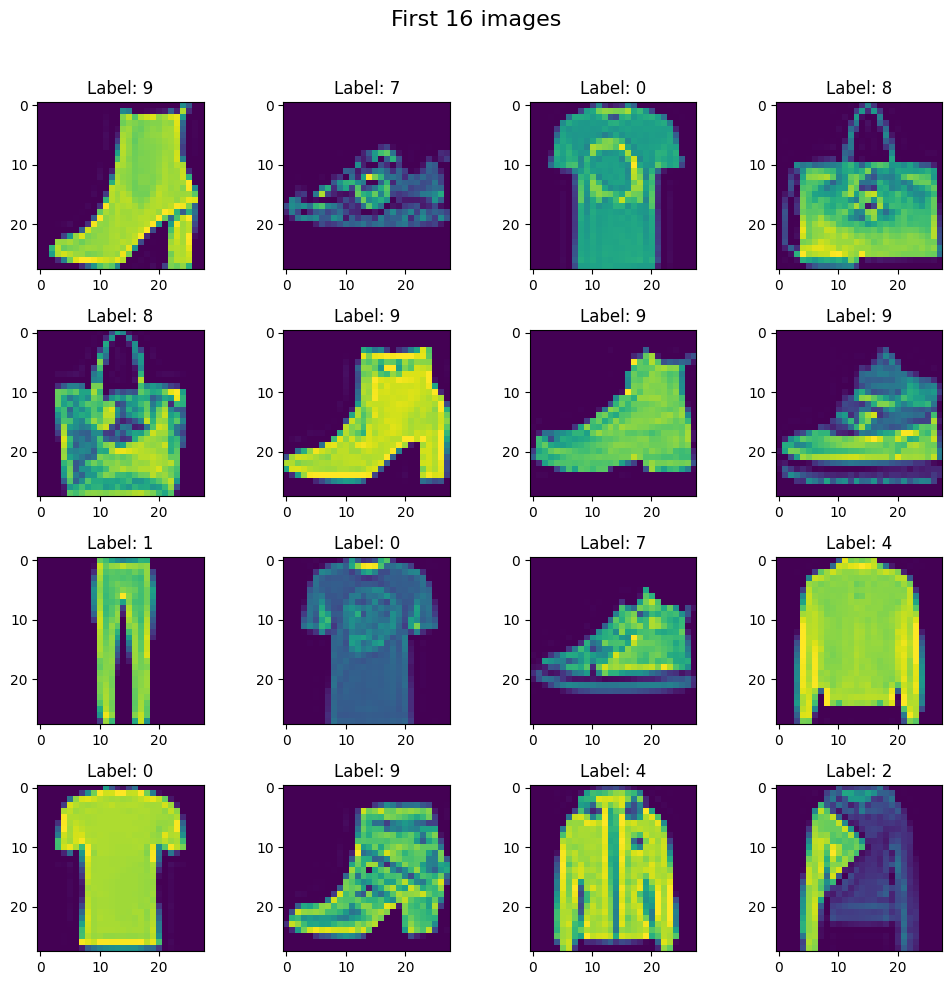

In [47]:
# Create 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28, 28)
  ax.imshow(img)
  ax.set_title(f"Label: {df.iloc[i, 0]}")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [48]:
# train test split
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Scaling the features
X_train = X_train / 255.0
X_test = X_test / 255.0

In [51]:
class CustomDataset(Dataset):
  def __init__(self, features, labels) -> None:
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [52]:
train_dataset = CustomDataset(X_train, y_train)

In [53]:
test_datset = CustomDataset(X_test, y_test)

In [54]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_datset, batch_size=32, shuffle=False)

In [55]:
class MyNN(nn.Module):
  def __init__(self, num_features) -> None:
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.model(x)

In [56]:
epochs = 1000
learning_rate = 0.1

In [57]:
model = MyNN(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [58]:
for epoch in range(epochs):
  total_epoch_loss = 0.0
  for batch_features, batch_labels in train_loader:
    outputs = model(batch_features)
    loss = criterion(outputs, batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_epoch_loss += loss.item()

  avg_loss = total_epoch_loss / len(train_loader)
  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}")

Epoch [100/1000], Loss: 0.0083
Epoch [200/1000], Loss: 0.0003
Epoch [300/1000], Loss: 0.0002
Epoch [400/1000], Loss: 0.0001
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


In [59]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [62]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _, predicted_label = torch.max(outputs, 1)
    total += batch_labels.shape[0]
    correct = correct + (predicted_label == batch_labels).sum().item()
print(correct / total)

0.835
